# Loading and preparing the data

In [1]:
# We first import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
# We now load the titanic data as a CSV
titanic_survival = pd.read_csv('Intro to data analysis.csv')

# Let's have a look at the data
titanic_survival.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# There should be data from 891 passengers
len(titanic_survival)

891

In [4]:
titanic_survival.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# What questions do we want to answer?

What factors made people more likely to survive? My assumption is that there were limited resources to save people and that there were some individuals trying to make decisions (maybe according to some protocol) about who to place on lifeboats first.
I suspect that the following factors may have an influence:
- Age: maybe children were more likely to be saved
- Sex: the same, maybe they were more likely to be saved
- Pclass: this is a proxy of social status and it's supposed to be the reason why Leonardo Di Caprio died in the movie
- parch: ok... if more children were saved, maybe they also saved their parents (specially the mother)
- sibs: maybe if your wife was saved, you were also likely to be saved

Additionally, I am curious also to answer these questions:
- Were there very different rates given the same Pclass. Maybe there were 2-3 top-luxury cabins? Or something similar?
- Were children and women more frequent in certain Pclass?

# Data cleaning

In [5]:
# Let's summarize the columns with numerical values to see if there's anything strange
titanic_survival[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
# Seems there are 0.0 Fares. They should be babies. Let's check it.
titanic_survival[titanic_survival.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_boolean,boolean_child,age_classification
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,False,False,adult
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,True,False,adult
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,False,False,adult
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,False,False,not determined
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,False,False,adult
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,False,False,not determined
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,False,False,not determined
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,False,False,not determined
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,False,False,adult
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,False,False,not determined


Ok, many people paid 0 for their trip and they were not babies. Maybe they were part of the crew but we really do not know. For now, we leave this data as it is.

In [42]:
# Seems there are some NaN values, let's see how many.
titanic_survival.isnull().sum()

PassengerId             0
Survived                0
Pclass                  0
Name                    0
Sex                     0
Age                   177
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                2
cabin_boolean           0
boolean_child           0
age_classification      0
dtype: int64

In [7]:
# Cabin and Age seem to have some NaN. Let's explore why
null_age_series = titanic_survival['Age'].isnull()
titanic_survival[null_age_series].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


I do not see any pattern at first sight so I assume the age was missing in some random cases.

In [43]:
# Let's do the same for the cabin
null_cabin_series = titanic_survival['Cabin'].isnull()
print "Table of number of passengers by class: missing cabin passengers"
print titanic_survival[null_cabin_series].groupby('Pclass')['PassengerId'].count()
print "Table of number of passengers by class: all sampled passengers"
print titanic_survival.groupby('Pclass')['PassengerId'].count()

Table of number of passengers by class: missing cabin passengers
Pclass
1     40
2    168
3    479
Name: PassengerId, dtype: int64
Table of number of passengers by class: all sampled passengers
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


So it seems that most of the passengers in classes 2 and 3 did not have a cabin assigned.

# Data Exploration

Let's do some basic quick plots to familiarize ourselves with the data a little bit.

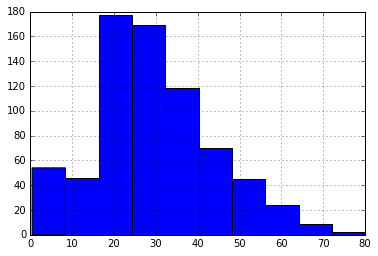

In [44]:
# Let's explore the age
titanic_survival['Age'].hist()

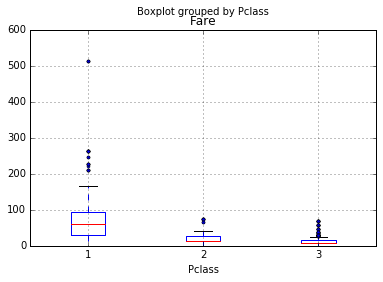

In [10]:
# Let's draw the ticket fares
titanic_survival.boxplot(column = 'Fare', by='Pclass', sym = 'k.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114683a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115591150>]], dtype=object)

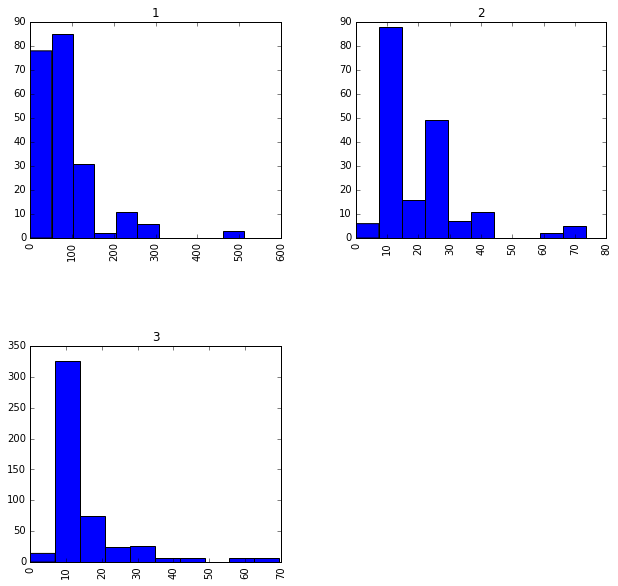

In [11]:
titanic_survival['Fare'].hist(by=titanic_survival['Pclass'], figsize = (10, 10))

Ok... There are some outliers in all three classes. Seems evident that in case of Pclass 1 there were several kinds of cabins: normal, suites, presidential suite, etc. But what about classes 2 and 3? Maybe the cheapest rates in these classes placed you in a "common area" and if you wanted a "private area" you had to pay more.

In [12]:
# Let's add an indicator variable to indicate whether the passenger had a cabin or not
titanic_survival['cabin_boolean'] = titanic_survival['Cabin'].isnull() == False

In [13]:
titanic_survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_boolean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False


In [14]:
titanic_survival.pivot_table(['Fare'], index=['Pclass'], columns = 'cabin_boolean')

Fare           
cabin_boolean      False      True 
Pclass                             
1              76.848643  85.815152
2              20.909673  18.063544
3              13.725077  11.698608

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115920390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11608f490>]], dtype=object)

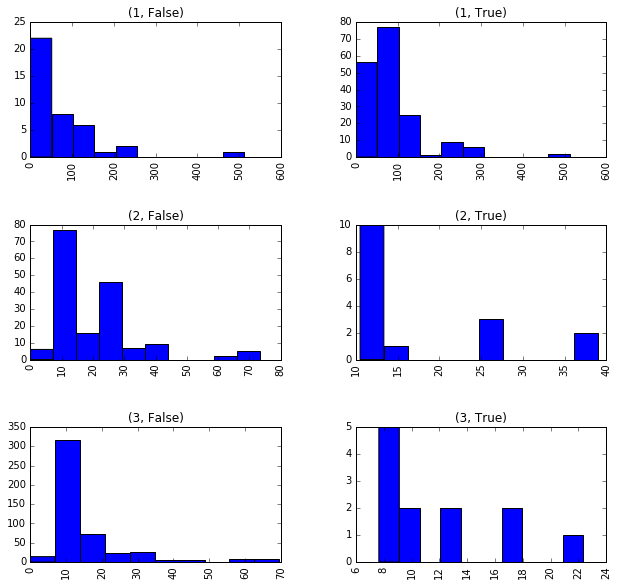

In [15]:
titanic_survival['Fare'].hist(by=[titanic_survival['Pclass'], titanic_survival['cabin_boolean']], figsize = (10, 10))

This plots do not lead anywhere and the crosstab contradicts our intuition. So, for the time being, we will consider this "cabin" issue as irrelevant.

# Where children and women more frequent in a certain Pclass?

First of all, we have to define what a child is. For the time being, every passenger of age less than 16 years old will be considered a child.

In [16]:
# Let's add an indicator column that indicates if a passenger is a child
titanic_survival['boolean_child'] = titanic_survival['Age'] <= 16
titanic_survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_boolean,boolean_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False,True


Let's now build some crosstabs to see if our intuition is right.

In [17]:
# What proportion of passengers were in each class?
print len(titanic_survival)
titanic_survival.groupby('Pclass')['PassengerId'].count()/len(titanic_survival)

891


Pclass
1    0.242424
2    0.206510
3    0.551066
Name: PassengerId, dtype: float64

In [18]:
# What was the proportion of children
titanic_survival.groupby('boolean_child')['PassengerId'].count()/len(titanic_survival)

boolean_child
False    0.887767
True     0.112233
Name: PassengerId, dtype: float64

In [19]:
# What was the proportion of women
titanic_survival.groupby('Sex')['PassengerId'].count()/len(titanic_survival)

Sex
female    0.352413
male      0.647587
Name: PassengerId, dtype: float64

In [50]:
# What was the proportion of males and females in each Pclass
pd.crosstab(titanic_survival['Pclass'], titanic_survival['Sex'], margins = False).apply(lambda x: x/x.sum(), axis = 1)

Sex,female,male
Pclass,,
1,0.435185,0.564815
2,0.413043,0.586957
3,0.293279,0.706721


In [51]:
# What was the proportion of children in each Pclass
pd.crosstab(titanic_survival['Pclass'], titanic_survival['boolean_child'], margins = False).apply(lambda x: x/x.sum(), axis = 1)

boolean_child,False,True
Pclass,,
1,0.958333,0.041667
2,0.885870,0.114130
3,0.857434,0.142566


Given these tables it seems that:
- Ratio of female passengers was more frequent in classes 1 and 2 versus class 3
- Ratio of children was higher in classes 2 and 3 versus class 1
To see if these differences are significant statistically, we wold have to perform some hypothesis testing.

# What factors made people more likely to survive

What factors made people more likely to survive? My assumption is that there were limited resources to save people and that there were some individuals trying to make decisions, maybe according to some protocol, about who to place on lifeboats first. I suspect that the following factors may have an influence:
- Age: maybe children were more likely to be saved
- Sex: maybe women were more likely to be saved
- Pclass: this is a proxy of social status and it's supposed to be the reason why Leonardo Di Caprio died in the movie
- parch: ok... if more children were saved, maybe they also saved their parents (specially the mother)
- sibs: maybe if your wife was saved, you were also likely to be saved

We first investigate age. We previously defined a child as a passenger of less than 16 years old. Let's see if children were more likely to be saved.

In [49]:
titanic_survival.groupby(['boolean_child', 'Survived'])['PassengerId'].count()

boolean_child  Survived
False          0           504
               1           287
True           0            45
               1            55
Name: PassengerId, dtype: int64

We have to look at the proportions in order to draw conclusions:

In [23]:
pd.crosstab(titanic_survival['boolean_child'], titanic_survival['Survived']).apply(lambda x: x/x.sum(), axis = 1)

Survived,0,1
boolean_child,,
False,0.637168,0.362832
True,0.450000,0.550000


So it seems that 55% of passengers of less than 16 years old were saved versus 36% of passengers older than 16 years old.

Maybe we can do better. A 1 year old baby has very little in common with a 16 years old, so we will classify people according to the following rules:
- Baby: < 1 year old
- Toddler: < 4 years old and >= 1 years old
- Child: < 10 years old and >= 4 years old
- Pre-teen: < 13 years old and >= 10 years old
- Teen: < 19 years old and >= 14 years old
- Adult: > 19

In [24]:
# Let's build a function for this
def classify_by_age(age):
    '''
    Returns a classification keyword based on the age
    Inputs:
    age (float) -- age of the passenger in years
    Outputs:
    string -- string indicating if passenger is a baby, toddler, etc
    '''
    if age < 1:
        return 'baby'
    elif age < 3:
        return 'toddler'
    elif age < 10:
        return 'child'
    elif age < 13:
        return 'preteen'
    elif age < 19:
        return 'teen'
    elif age < 125:
        return 'adult'
    else:
        return 'not determined'

In [25]:
# We build a column with this
age_order = ['baby', 'toddler', 'child', 'preteen', 'teen', 'adult', 'not determined']
titanic_survival['age_classification'] = titanic_survival['Age'].apply(classify_by_age)

In [26]:
# Let's build a similar table with this
pd.crosstab(titanic_survival['age_classification'], titanic_survival['Survived']).reindex(copy = False, index = age_order)

Survived,0,1
age_classification,,
baby,0,7
toddler,9,8
child,15,23
preteen,5,2
teen,40,30
adult,355,220
not determined,125,52


In [27]:
# Let's compute the ratios
pd.crosstab(titanic_survival['age_classification'],
            titanic_survival['Survived']).apply(lambda x: x / x.sum(), axis = 1).reindex(copy = False, index = age_order)

Survived,0,1
age_classification,,
baby,0.000000,1.000000
toddler,0.529412,0.470588
child,0.394737,0.605263
preteen,0.714286,0.285714
teen,0.571429,0.428571
adult,0.617391,0.382609
not determined,0.706215,0.293785


There are other ways to split by age. We could, for example, build buckets with size 5.

In [76]:
# Let's build buckets with size 5
titanic_survival['age_bucket'] = pd.cut(titanic_survival['Age'], range(0,85, 5))
titanic_survival.groupby('age_bucket')['Survived'].mean()
titanic_survival['age_bucket']

0      (20, 25]
1      (35, 40]
2      (25, 30]
3      (30, 35]
4      (30, 35]
5           NaN
6      (50, 55]
7        (0, 5]
8      (25, 30]
9      (10, 15]
10       (0, 5]
11     (55, 60]
12     (15, 20]
13     (35, 40]
14     (10, 15]
15     (50, 55]
16       (0, 5]
17          NaN
18     (30, 35]
19          NaN
20     (30, 35]
21     (30, 35]
22     (10, 15]
23     (25, 30]
24      (5, 10]
25     (35, 40]
26          NaN
27     (15, 20]
28          NaN
29          NaN
         ...   
861    (20, 25]
862    (45, 50]
863         NaN
864    (20, 25]
865    (40, 45]
866    (25, 30]
867    (30, 35]
868         NaN
869      (0, 5]
870    (25, 30]
871    (45, 50]
872    (30, 35]
873    (45, 50]
874    (25, 30]
875    (10, 15]
876    (15, 20]
877    (15, 20]
878         NaN
879    (55, 60]
880    (20, 25]
881    (30, 35]
882    (20, 25]
883    (25, 30]
884    (20, 25]
885    (35, 40]
886    (25, 30]
887    (15, 20]
888         NaN
889    (25, 30]
890    (30, 35]
Name: age_bucket, dtype:

From this data it seems that probabilities of surviving were higher for children younger than 10 years old and moderately higher in case of children younger than 19 years old.

We now perform the same analyis for women.

In [28]:
pd.crosstab(titanic_survival['Sex'], titanic_survival['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [29]:
pd.crosstab(titanic_survival['Sex'], titanic_survival['Survived']).apply(lambda x: x / x.sum(), axis = 1)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


74% of women in the sample survived compared to 10% of males. It seems that the "Women first" policy was part of the protocol.

We do the same for Pclass:

In [30]:
pd.crosstab(titanic_survival['Pclass'], titanic_survival['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [31]:
# Now we calculate the percentages

pd.crosstab(titanic_survival['Pclass'], titanic_survival['Survived']).apply(lambda x: x / x.sum(), axis = 1)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


It seems that 1st class passengers had an advantage. However, we should be cautious. It could be the case that this is happening because women are more frequent in class 1 (as we saw before).

Now, we calculate similar tables for "parch" and for "sibs"

In [32]:
pd.crosstab(titanic_survival['Parch'], titanic_survival['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [33]:
pd.crosstab(titanic_survival['Parch'], titanic_survival['Survived']).apply(lambda x: x / x.sum(), axis = 1)

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


Ok. For Parch > 2 there is not a lot of data. For Parch <= 2 the table is not very revealing but it is consistent with my intuition: passengers with parents or children aboard are more likely to be children or mothers (both more likely to be saved).
It would be interesting to do this table for children and adults separately:

In [34]:
pd.crosstab(titanic_survival[titanic_survival['boolean_child'] == False]['Parch'], titanic_survival[titanic_survival['boolean_child'] == False]['Survived'])

Survived,0,1
Parch,,
0,435,221
1,37,38
2,22,24
3,1,3
4,4,0
5,4,1
6,1,0


In [35]:
pd.crosstab(titanic_survival[titanic_survival['boolean_child'] == True]['Parch'], titanic_survival[titanic_survival['boolean_child'] == True]['Survived'])

Survived,0,1
Parch,,
0,10,12
1,16,27
2,18,16
3,1,0


In [36]:
From these two 

SyntaxError: invalid syntax (<ipython-input-36-4138e43e82d5>, line 1)

In [ ]:
435+221+37+38+22+24+1+3+4+0+4+1+1+0